# **Data Exploration: GPA, Gender, and Exercise Patterns**

Summer 2025 Data Science Project

Suhani Patel, Jonathan Ehiriodo, Tahir Beverly, Jasper Coles Hood

Contributions:

Suhani Patel : (B) Dataset Curation and Preprocessing, Suhani imported, parsed, and organized our data. (C) Data exploration and Summary Statistics, everyone split up this work. Suhani did Conclusion 3 using the BRFSS data and used the chi-squared test. Suhani also created the plot. (G) Final Tutorial Report Creation, Suhani formatted the final site and wrote the headers and introduction.

Jonathan Ehiriodo : (A) Project idea, while everyone shared their interestests Jonathan came up with the idea to work on something involving fitness. (C) Data exploration and Summary Statistics, everyone split up this work. Jonathan did Conclusion 1 using FitBit data and used T test. Jonathan also created the plot. (E)(F)He also provided some visuals for the ML methods we used and provided the overall conclusion for checkpoint 3

Tahir Beverly : (C) Data exploration and Summary Statistics, everyone split up this work. Tahir did one conclusion using FitBit data and used Z test. (E and F) Did additional prep-work for ML training and performed test-metrics for different models of Regression and Classification.

Jasper Hood : (C) Data exploration and Summary Statistics, everyone split up this work. Jasper created the plot for Conclusion 2. (G) He also wrote the information about the EDA and data sets. (D/E) He tested different parameters for the random forest model and evaulated the performance with Tahir (F) He also visualized max depth evaulations.





# Introduction

Physical activity and academic performance are both important indicators of overall well-being, particularly among students. In this project, we explore the relationships between exercise habits, gender, and academic outcomes using two datasets: one from Fitbit users that includes GPA and fitness behavior, and another from the 2017 Behavioral Risk Factor Surveillance System (BRFSS) that captures national fitness trends.

Our analysis seeks to answer the following questions:

1. Is the average GPA of students who run regularly higher than those who walk?

2. Do women have significantly different GPAs compared to the general student population?

3. Are people more likely to meet aerobic activity guidelines than strength training guidelines in 2017?

These questions help us understand not only the potential links between physical activity and academic achievement, but also broader public health patterns. Insights from this exploration can inform both educational institutions and health organizations as they design programs to support student success and nationwide fitness goals.

Data Curation/Preprocessing:

In [ ]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from math import sqrt
from google.colab import drive

# drive.mount('/content/drive')
# data_dir = '/content/drive/MyDrive/PATH_TO_FILES'
# fitbit_df = pd.read_csv(data_dir)
# brfss = pd.read_csv(data_dir)
fitbit_df = pd.read_csv('FitbitsAndGradesData_Fall2017.csv')
brfss = pd.read_csv('BRFSS_Physical_Acticity.csv')


## Exploratory data analysis
This data comes from
https://www.kaggle.com/datasets/aleespinosa/fitbits-fieldtests-and-grades
and
https://www.kaggle.com/datasets/asasherwyn/brfss-physical-activity-2015-2021?select=BRFSS+Physical+Acticity.csv
The first dataset describes the fitbit collected data of 581 college students at ORU, as well as their GPA's throughout the sample time. Student identities are kept secret, and where participants in an experiment that required they track certain physical statistics. Tracked statistics include steps, peak activity, cardio, mode of excercise, fat burned, minutes of excercise, along with gender and age

The second dataset comes from the Behavioral Risk Factor Surveillance System, which used surveys to gain insights about US adult phsyical health. They asked a series of four questions that asked:
A: During the past month, did you participate in any physical activities?
B: Participated in 150 minutes or more of Aerobic Physical Activity per week?
C: Participated in enough Aerobic and Muscle Strengthening exercises to meet guidelines?
D: Participated in muscle strengthening exercises two or more times per week?

These data were collected between 2015 and 2021 and are organized by year and state.

**Conclusion 1: Using FitBit data**

NOTE: For Gender 0 is men and 1 is women  AND for Mode 0 is walk and 1 is run for the cardio
The columns are, for the most part, in a great order relative to each other; however, we decided to move Mode next to Cardio to logically show the type of cardio being done. The dataset has 11 features that all relate directly to the exercise habits of the interviewed subjects.

Null hypothesis: Average GPA for runners will be less than or equal to the walkers

Alternative hypothesis: Average GPA for runners will be greater than the walkers

We are fairly confident so a significance of .02 will be used; confidence level 98%

n=581

Analysis of GPA relative to cardio mode chosen/used using T test.
Median value is red line and mean is the tip of the green arrow.


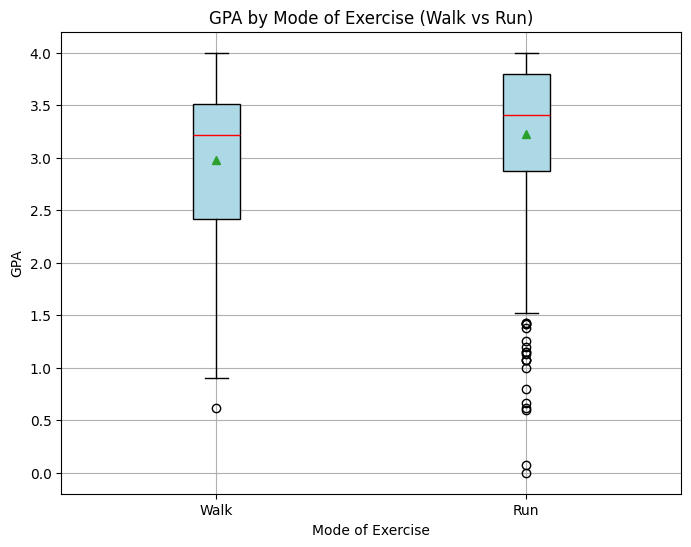

T-statistic: 2.703
p-value (H₁: runners > walkers): 0.0040
As seen, the p value is less than the significance level(.02) such that we can reject the Null.
We can conclude that the average GPA for runners is actually greater than that of
the walkers


In [ ]:
fitBitData = fitbit_df
#fitBitData
fitBitData = fitBitData[['Key', 'Steps', 'Peak', 'Cardio', 'Mode', 'FatBurn', 'Minutes',
                         'Gender', 'Age', 'GPA', 'Life Score']]

print("Analysis of GPA relative to cardio mode chosen/used using T test.")
print("Median value is red line and mean is the tip of the green arrow.")
gpaWalk = fitBitData[fitBitData['Mode'] == 0]['GPA']
gpaRun = fitBitData[fitBitData['Mode'] == 1]['GPA']

plt.figure(figsize=(8, 6))
plt.boxplot([gpaWalk, gpaRun], patch_artist=True,showmeans=True,
            boxprops=dict(facecolor='lightblue'),
            medianprops=dict(color='red'))


plt.xticks([1, 2], ['Walk', 'Run'])
plt.title('GPA by Mode of Exercise (Walk vs Run)')
plt.xlabel('Mode of Exercise')
plt.ylabel('GPA')
plt.grid(True)
plt.show()





tValue, pValueTwoSample = stats.ttest_ind(gpaRun, gpaWalk, equal_var=False)

if tValue > 0:
    pValueTwoSample = pValueTwoSample / 2
else:
    pValueTwoSample = 1 - (pValueTwoSample / 2)

print(f"T-statistic: {tValue:.3f}")
print(f"p-value (H₁: runners > walkers): {pValueTwoSample:.4f}")
print("As seen, the p value is less than the significance level(.02) such that we can reject the Null.")
print("We can conclude that the average GPA for runners is actually greater than that of")
print("the walkers")




**Conclusion 2: Using FitBit data**

Question: Do women have higher GPA's on average?

Null hypothesis: There is no significant difference between the average gpa of female students and the average gpa of the population

Alernative hypothesis: The average GPA based on gender is not equal. (There is significant difference)

Z-test comparing the sample GPA of women at the university vs the entire dataset

In [ ]:
# Sample mean (GPA for women)
xbar = fitBitData[fitBitData['Gender'] == 1]['GPA'].mean()
print(f'sample mean: {xbar}')
# Sample size (# of women)
n = len(fitBitData[fitBitData['Gender'] == 1]['GPA'])
print(f'sample size: {n}')

# Population Mean
mu = fitBitData['GPA'].mean()
print(f'population mean: {mu}')
# Population std dev
sigma = fitBitData['GPA'].std()
print(f'population std dev: {sigma}')
# Alpha (Significance) Level
alpha = 0.05

# Z-score
z = (xbar - mu) / (sigma / sqrt(n))
# Total Tail Area (p-value)
twoTail = 2 * (1 - stats.norm.cdf(abs(z)))

print(f'z-score: {z}')
print(f'p-value {twoTail}')

if twoTail <= alpha:
  print(f'Rejection of H0: There is a significant difference between means')
else:
  print(f'Fail to Reject H0: Average GPA is equivalent between women and population')

sample mean: 3.2782848837209304
sample size: 344
population mean: 3.186919104991394
population std dev: 0.7577477803445738
z-score: 2.236341425101386
p-value 0.0253294148780987
Rejection of H0: There is a significant difference between means


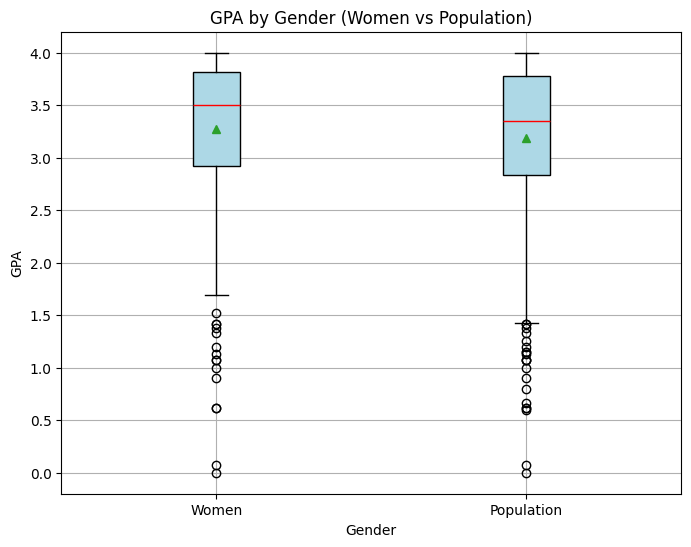

In [ ]:
gpaWomen = fitBitData[fitBitData['Gender'] == 1]['GPA']
gpaAll = fitBitData['GPA']
plt.figure(figsize=(8, 6))
plt.boxplot([gpaWomen, gpaAll], patch_artist=True,
            boxprops=dict(facecolor='lightblue'),
            medianprops=dict(color='red'), showmeans=True)

plt.xticks([1, 2], ['Women', 'Population'])
plt.title('GPA by Gender (Women vs Population)')
plt.xlabel('Gender')
plt.ylabel('GPA')
plt.grid(True)
plt.show()

**Conclusion 3: Using BRFSS Data**

*Question:*
Are people more likely to meet aerobic guidelines than strength training guidelines in 2017?

*Null hypothesis:*
People are equally likely to meet aerobic and strength guidelines in 2017. (There is no difference)

*Alernative hypothesis:*
People are more likely to meet aerobic guidelines than strength guidelines in 2017. (There is significant difference)

Analysis of amount of people meeting aerobic guidelines vs strength training guidlines in 2017 using **Chi-squared test**.

In [ ]:
from scipy.stats import chi2_contingency

brfss_2021 = brfss[brfss['year']== 2017].iloc[0]

data = {
    'Activity': ['Aerobic', 'Aerobic', 'Strength', 'Strength'],
    'Meet_Guidelines': ['Yes', 'No', 'Yes', 'No'],
    'count': [
        brfss_2021['PAINDX2_yes_value'],
        brfss_2021['PAINDX2_no_value'],
        brfss_2021['PASTRNG_yes_value'],
        brfss_2021['PASTRNG_no_value']
    ]
}

brfss_counts = pd.DataFrame(data)

contingency_table = pd.crosstab(brfss_counts['Activity'],
                                brfss_counts['Meet_Guidelines'],
                                values = brfss_counts['count'],
                                aggfunc='sum')
print("Contingency Table:\n")
print(contingency_table.to_string(index=True))

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-square statistic: {chi2}")
print(f"\nP-value: {p_value}")
print(f"\nDegrees of freedom: {dof}")
print(f"\nExpected frequencies: {expected}")

alpha = 0.05

if p_value < alpha:
  print("\nReject null hypothesis. There is a significant difference in participation between aerobic and strength training.")
else:
  print("\nFail to reject null hypothesis. There is no significant difference in participation between aerobic and strength training.")


Contingency Table:

Meet_Guidelines    No   Yes
Activity                   
Aerobic          57.2  42.8
Strength         74.0  26.0

Chi-square statistic: 5.531232274532046

P-value: 0.018679944835576587

Degrees of freedom: 1

Expected frequencies: [[65.6 34.4]
 [65.6 34.4]]

Reject null hypothesis. There is a significant difference in participation between aerobic and strength training.


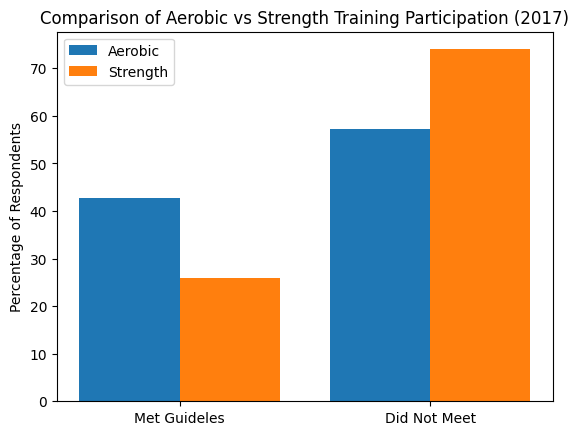

In [ ]:
#Plot
labels = ['Met Guideles', 'Did Not Meet']
aerobic = [42.8, 57.2]
strength = [26, 74]
x = range(len(labels))

plt.bar(x, aerobic, width=0.4, label='Aerobic', align='center')
plt.bar([i+0.4 for i in x], strength, width = 0.4, label='Strength', align='center')

plt.xticks([i+0.2 for i in x], labels)
plt.ylabel('Percentage of Respondents')
plt.title('Comparison of Aerobic vs Strength Training Participation (2017)')
plt.legend()
plt.show()

[more about dataset 1 ](https://www.researchgate.net/profile/Andrew-Lang-13/publication/333456807_Fitbits_field-tests_and_grades_The_effects_of_a_healthy_and_physically_active_lifestyle_on_the_academic_performance_of_first_year_college_students/links/5ed14785299bf1c67d273bbb/Fitbits-field-tests-and-grades-The-effects-of-a-healthy-and-physically-active-lifestyle-on-the-academic-performance-of-first-year-college-students.pdf?origin=publication_detail)

Primary Analysis (Machine Learning)

In [ ]:
# Libraries
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict, KFold

# evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

# regressor imports
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# Dataset 1 temporary additional preprocessing + eda

# LifeScore determined via health survey:
#   (Very Healthy: <40, Healthy: 41-70, Avg: 71-100, Unhealthy: 101-130, Very Unhealthy: >131)
# FatBurn: total active minutes in FatBurn zone -> heart rate within 50% - 69% of its maximum
# Cardio: total active minutes in Cardio zone -> heart rate within 70% - 84% of its maximum
# Peak: total active minutes in Peak zone -> heart rate > 85% of its maximum

print(f'Shape:', fitbit_df.shape)
print(f"Number of Samples: {len(fitbit_df)}")
print(f"Number of Features: {len(fitbit_df.columns)}")
print(fitbit_df.columns)
fitbit_df.head()

Shape: (581, 11)
Number of Samples: 581
Number of Features: 11
Index(['Key', 'Steps', 'Peak', 'Cardio', 'FatBurn', 'Mode', 'Minutes',
       'Gender', 'Age', 'GPA', 'Life Score'],
      dtype='object')


,Key,Steps,Peak,Cardio,FatBurn,Mode,Minutes,Gender,Age,GPA,Life Score
0,1,11157,0.13,3.86,111.92,1,9.35,1,23,4.00,48
1,2,7986,2.72,15.53,249.29,1,8.20,1,18,3.26,101
2,3,11602,0.35,2.10,195.32,0,12.73,0,18,3.07,64
3,4,10609,1.00,6.51,121.75,1,10.00,1,17,4.00,41
4,5,14552,9.10,6.09,109.66,1,8.63,0,18,2.87,83


Minutes measures students recorded times for a 1-mile field test. In preliminary testing for correlation, this field was one of the lowest in relation to GPA. We also already have an index column so 'Key' will be dropped.

In [ ]:
# additional cleaning
fitbit_df1 = fitbit_df.copy()
fitbit_df1 = fitbit_df1.drop(columns=['Key','Minutes']) # don't need
fitbit_df1['TotalActiveMinutes'] = fitbit_df1['Peak'] + fitbit_df1['Cardio'] + fitbit_df1['FatBurn']
fitbit_df1.head()

,Steps,Peak,Cardio,FatBurn,Mode,Gender,Age,GPA,Life Score,TotalActiveMinutes
0,11157,0.13,3.86,111.92,1,1,23,4.00,48,115.91
1,7986,2.72,15.53,249.29,1,1,18,3.26,101,267.54
2,11602,0.35,2.10,195.32,0,0,18,3.07,64,197.77
3,10609,1.00,6.51,121.75,1,1,17,4.00,41,129.26
4,14552,9.10,6.09,109.66,1,0,18,2.87,83,124.85


In [ ]:
missing_data = {}
for col in fitbit_df1:
  missing_data[col] = int(fitbit_df1[col].isna().sum())

print(missing_data) # No missing data! yippee!

{'Steps': 0, 'Peak': 0, 'Cardio': 0, 'FatBurn': 0, 'Mode': 0, 'Gender': 0, 'Age': 0, 'GPA': 0, 'Life Score': 0, 'TotalActiveMinutes': 0}


In [ ]:
# features v target
X = fitbit_df1.drop(columns=['GPA']) # features
Y = fitbit_df1['GPA'] # target
display(X.head())
display(Y.head())

,Steps,Peak,Cardio,FatBurn,Mode,Gender,Age,Life Score,TotalActiveMinutes
0,11157,0.13,3.86,111.92,1,1,23,48,115.91
1,7986,2.72,15.53,249.29,1,1,18,101,267.54
2,11602,0.35,2.10,195.32,0,0,18,64,197.77
3,10609,1.00,6.51,121.75,1,1,17,41,129.26
4,14552,9.10,6.09,109.66,1,0,18,83,124.85


,GPA
0,4.00
1,3.26
2,3.07
3,4.00
4,2.87


Testing with different regression models. This is a preliminary stage using K-Fold cross-validation (instead of Stratified which is used for classifications) for a model that could yield the best predictive results.

In [ ]:
models = {
    'LinearRegression': LinearRegression(),
    'KNN': KNeighborsRegressor(),
    'SVM': SVR(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    'Lasso': Lasso(alpha=0.1),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet(alpha=0.1,l1_ratio=0.5)
}

In [ ]:
# Cross Validation
seed = 42
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=seed)

# eva
for name, model in models.items():
  np.random.seed(seed) # reproducibility
  pipeline = make_pipeline(StandardScaler(),model)

  r2score = cross_val_score(pipeline, X, Y, scoring='r2',cv=kf)
  y_pred = cross_val_predict(pipeline,X,Y,cv=kf)
  mse = mean_squared_error(Y,y_pred)
  rmse = np.sqrt(mse)

  print(f'{name} Cross-Validation Metrics:')
  print(f'\tR^2: {r2score.mean()} (+/- {r2score.std()})')
  print(f'\tMSE: {mse}')
  print(f'\tRMSE: {rmse}')

LinearRegression Cross-Validation Metrics:
	R^2: 0.17192172124017768 (+/- 0.07512336717933395)
	MSE: 0.4659720935658091
	RMSE: 0.6826214863054115
KNN Cross-Validation Metrics:
	R^2: 0.08933526945691336 (+/- 0.05504705868796181)
	MSE: 0.5121881032702237
	RMSE: 0.7156731818855753
SVM Cross-Validation Metrics:
	R^2: 0.1583371884497336 (+/- 0.08005965881411303)
	MSE: 0.47690140718439666
	RMSE: 0.6905804856672368
DecisionTree Cross-Validation Metrics:
	R^2: -0.46268722891178504 (+/- 0.293930948407037)
	MSE: 0.8299826161790017
	RMSE: 0.9110338172532355
RandomForest Cross-Validation Metrics:
	R^2: 0.19112600061017013 (+/- 0.05882012903647047)
	MSE: 0.4558006707573149
	RMSE: 0.6751301139464265
Lasso Cross-Validation Metrics:
	R^2: 0.12697222449222836 (+/- 0.02799181598171438)
	MSE: 0.4912000102035124
	RMSE: 0.7008566259967244
Ridge Cross-Validation Metrics:
	R^2: 0.17197325674773306 (+/- 0.07501993599519166)
	MSE: 0.4659514678977154
	RMSE: 0.6826063784478691
ElasticNet Cross-Validation Metrics

In [ ]:
# hmmm really low R^2 values and other metrics not looking too good. What's up with the correlation?
fitbit_df1.corr()['GPA'].sort_values(ascending=False)

,GPA
GPA,1.000000
Steps,0.411026
FatBurn,0.148278
Gender,0.145391
TotalActiveMinutes,0.143569
Mode,0.114493
Cardio,0.069995
Peak,-0.011124
Age,-0.014207
Life Score,-0.112735


'In the Zone' individual correlations (FatBurn, Cardio, Peak) not too good so will combine them and drop the individual scores. Will also drop life score (there was not a lot of confidence in the paper/source's data collection of this anyway). RandomForest seems to be doing the best somewhat so will move forward with that.

In [ ]:
# partition
fitbit_df1 = fitbit_df1.drop(columns=['FatBurn','Cardio','Peak','Life Score'])
X = fitbit_df1.drop(columns=['GPA'])
Y = fitbit_df1['GPA']

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.42,random_state=seed)
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

### Training w/ Random Forest Regression


In [ ]:
model = models.get("RandomForest")
model.fit(X_train_scaled,y_train)

y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

y_pred_train = model.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

print(f'RandomForest: Test Stats')
print(f'\tR^2: {r2}')
print(f'\tMSE: {mse}')
print(f'\tRMSE: {rmse}')

print(f'RandomForest: Train Stats')
print(f'\tR^2: {r2_train}')
print(f'\tMSE: {mse_train}')
print(f'\tRMSE: {rmse_train}')


RandomForest: Test Stats
	R^2: 0.040429473761297574
	MSE: 0.4905482249795918
	RMSE: 0.7003914798022545
RandomForest: Train Stats
	R^2: 0.8742943043122018
	MSE: 0.07747179392857143
	RMSE: 0.27833755393150134


The RandomForest model captured most of the variance of the training data with an R^2 of .874. The test data performance was only R^2 of .04 though. Along with the RMSE increase from train to test (.28 to .70 for test) means that model displays strong signs of overfitting. This is probably because the activity features in the dataset were probably not correlated enough to GPA to predict it reliably with a complex model like RandomForest. As such, further ahead we tried different techniques.

Bar chart to visualize train vs test results.

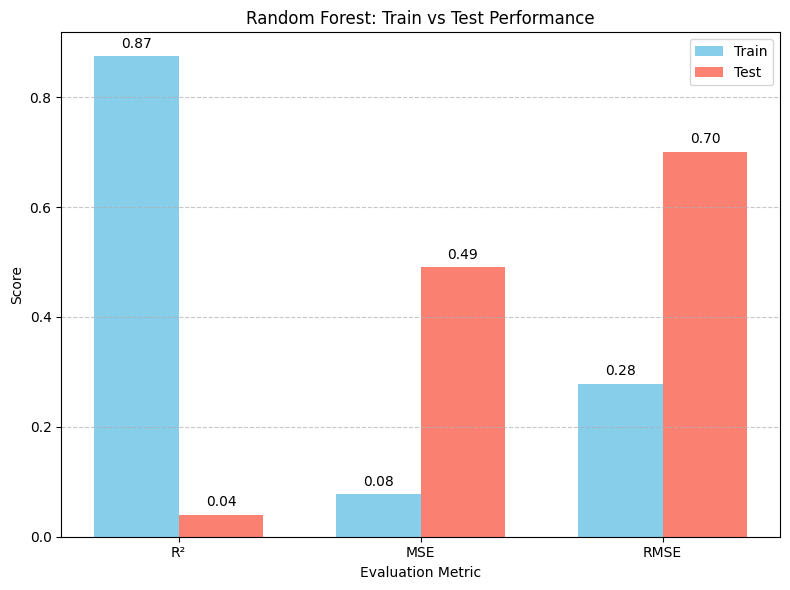

In [ ]:
metrics = ['R²', 'MSE', 'RMSE']

train_scores = [r2_train, mse_train, rmse_train]
test_scores = [r2, mse, rmse]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8, 6))
bars1 = plt.bar(x - width/2, train_scores, width, label='Train', color='skyblue')
bars2 = plt.bar(x + width/2, test_scores, width, label='Test', color='salmon')

plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.title('Random Forest: Train vs Test Performance')
plt.xticks(x, metrics)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar_group in [bars1, bars2]:
    for bar in bar_group:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


RandomForest: Depth 1
RandomForest: Test Stats
	R^2: 0.14450597632602635
	MSE: 0.43734260621665016
	RMSE: 0.6613188385466198
RandomForest: Train Stats
	R^2: 0.2533671155598045
	MSE: 0.4601461266107159
	RMSE: 0.6783407157253026
RandomForest: Depth 2
RandomForest: Test Stats
	R^2: 0.1557108354810156
	MSE: 0.4316144980481225
	RMSE: 0.6569737422820813
RandomForest: Train Stats
	R^2: 0.28794521511559124
	MSE: 0.43883581613854244
	RMSE: 0.6624468402359109
RandomForest: Depth 3
RandomForest: Test Stats
	R^2: 0.15109195512717644
	MSE: 0.4339757456031618
	RMSE: 0.6587683550408002
RandomForest: Train Stats
	R^2: 0.3616436974425634
	MSE: 0.39341580868029763
	RMSE: 0.6272286733562948
RandomForest: Depth 4
RandomForest: Test Stats
	R^2: 0.14454073470631146
	MSE: 0.43732483716134285
	RMSE: 0.6613054038500993
RandomForest: Train Stats
	R^2: 0.4503779818091187
	MSE: 0.33872931134036605
	RMSE: 0.5820045629892999
RandomForest: Depth 5
RandomForest: Test Stats
	R^2: 0.13775870834491455
	MSE: 0.4407919205

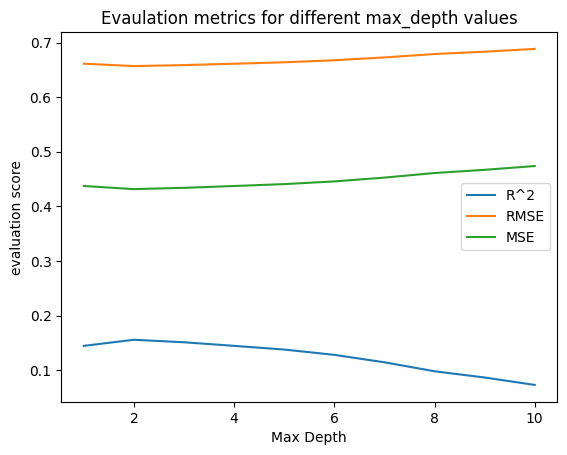

In [ ]:
arr_r2 = []
arr_rmse = []
arr_mse = []
for i in range(1,11):
  print(f'RandomForest: Depth {i}')
  rf_classifier = RandomForestRegressor(max_depth=i, random_state=122)
  model = rf_classifier.fit(X_train_scaled, y_train)

  y_pred = model.predict(X_test_scaled)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)

  y_pred_train = model.predict(X_train_scaled)
  mse_train = mean_squared_error(y_train, y_pred_train)
  rmse_train = np.sqrt(mse_train)
  r2_train = r2_score(y_train, y_pred_train)

  print(f'RandomForest: Test Stats')
  print(f'\tR^2: {r2}')
  print(f'\tMSE: {mse}')
  print(f'\tRMSE: {rmse}')

  print(f'RandomForest: Train Stats')
  print(f'\tR^2: {r2_train}')
  print(f'\tMSE: {mse_train}')
  print(f'\tRMSE: {rmse_train}')
  arr_r2.append(r2)
  arr_rmse.append(rmse)
  arr_mse.append(mse)

plt.plot(range(1,11),arr_r2,label='R^2')
plt.plot(range(1,11),arr_rmse,label='RMSE')
plt.plot(range(1,11),arr_mse,label='MSE')
plt.title("Evaulation metrics for different max_depth values")
plt.xlabel('Max Depth')
plt.ylabel('evaluation score')
plt.legend()
plt.show()

Instead of Regression, let's bin the GPA target into high and low GPA's. From there we will add Logistic Regression and swap the other models out for classifiers.

In [ ]:
from sklearn.model_selection import StratifiedKFold

# classifier model imports
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# eval metrics
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
fitbit_df2 = fitbit_df.copy()
# binning GPA
fitbit_df2['GPA'] = fitbit_df2['GPA'].map(lambda x: 1 if x >= 3.5 else 0)
fitbit_df2['GPA'].value_counts() # decent class split

,count
GPA,
0,333
1,248


In [ ]:
fitbit_df2 = fitbit_df2.drop(columns=['FatBurn','Cardio','Peak','Life Score'])

#repartition
X = fitbit_df2.drop(columns=['GPA'])
Y = fitbit_df2['GPA']
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.42,random_state=seed)
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

cmodels = {
    'LogisticRegression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier()
}

In [ ]:
# crossvalidate again w/ different metrics. Using StratifiedKFold now
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=seed)

# eva
for name, model in cmodels.items():
  np.random.seed(seed) # reproducibility

  cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring='accuracy')
  print(f"{name} Accuracy: {cv_scores.mean()} (+/- {cv_scores.std()})")

LogisticRegression Accuracy: 0.6576821773485515 (+/- 0.04659528229147529)
KNN Accuracy: 0.5953028972783143 (+/- 0.030885215392624645)
SVM Accuracy: 0.672739244951712 (+/- 0.03999456920971648)
DecisionTree Accuracy: 0.5981562774363477 (+/- 0.035871643715963256)
RandomForest Accuracy: 0.6280948200175592 (+/- 0.07240423019974858)


In [ ]:
# final Training w/ SVM
model = cmodels.get("SVM")
model.fit(X_train_scaled,y_train)

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Accuracy: {accuracy:.3f}')
print(classification_report(y_test, y_pred))

SVM Accuracy: 0.653
              precision    recall  f1-score   support

           0       0.67      0.73      0.70       136
           1       0.62      0.56      0.59       109

    accuracy                           0.65       245
   macro avg       0.65      0.64      0.64       245
weighted avg       0.65      0.65      0.65       245



<Figure size 600x500 with 0 Axes>

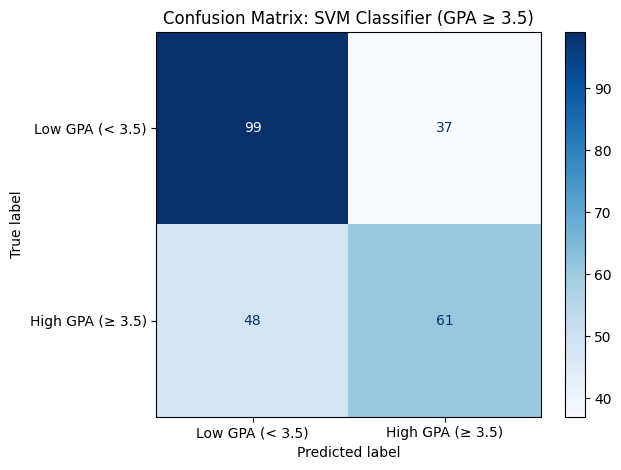

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix




cm = confusion_matrix(y_test, y_pred)
labels = ['Low GPA (< 3.5)', 'High GPA (≥ 3.5)']

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix: SVM Classifier (GPA ≥ 3.5)")
plt.grid(False)
plt.tight_layout()
plt.show()


From the SVM classifier results we can see that the model had an overall accuracy of 65 percent. It was better at selecting properly students with lower GPA(recall at .73) than those with high GPA(recall at .56). The recall and precision were overall quite low though especially for the high GPA. There is a possibility that since the classes(high or low) were a bit unbalanced, it could have affected things.This suggests that the features in our fitbit data might not have strong enough signals to predict academic outcomes accurately. However, it was better than our original regression attempt with RandomForest.

Overall conclusion

The fitbit data physical activity metrics are weak predictors of student GPA. RandomForest had high training accuracy but low test showing high overfitting. SVM was a bit better but the low overall accuracy(65 percent) suggests low or no detectable patterns in the data for a model.